In [1]:
# Python Notebook for PHYS 422 Assignment #1 

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'

from matplotlib.colors import PowerNorm


In [19]:
big_omega = np.array([1/18.525, 1/25.711, 1/33.367,1/39.308,1/50.235, 1/60.095]) *2*np.pi
lil_omega = np.array([1/5.271, 1/4.367, 1/3.605,1/2.998,1/2.440, 1/2.051]) *2*np.pi*10



names = ['Low', "Med-Low", "Med", "Med-High", 'High', 'Super High', 'Super Super High']

In [27]:
for i in range(len(big_omega)):
    
    print(names[i] + ' & ' +f'${big_omega[i]:0.2f} \pm 0.005 $ ' + ' & ' + f'${lil_omega[i]:0.2f}\pm 0.005$' + ' \\\\ ')
    print('\hline')

Low & $0.34 \pm 0.005 $  & $11.92\pm 0.005$ \\ 
\hline
Med-Low & $0.24 \pm 0.005 $  & $14.39\pm 0.005$ \\ 
\hline
Med & $0.19 \pm 0.005 $  & $17.43\pm 0.005$ \\ 
\hline
Med-High & $0.16 \pm 0.005 $  & $20.96\pm 0.005$ \\ 
\hline
High & $0.13 \pm 0.005 $  & $25.75\pm 0.005$ \\ 
\hline
Super High & $0.10 \pm 0.005 $  & $30.63\pm 0.005$ \\ 
\hline


In [3]:
def lin_fit(x, m,b):
    return m*x+b

def chi_squared_reduced2(data, model, sigma, dof=None):

    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / (model**2))
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        return chi_sq / nu

p0 = (9,0.06) # start with values near those we expect
params, cv = sp.optimize.curve_fit(lin_fit, lil_omega, 1/big_omega, p0)
m,b = params
err_con = np.sqrt(np.diag(cv))

print(params, err_con)

opt_omega = lin_fit(np.array(lil_omega), *params)

omega_chi = chi_squared_reduced2(big_omega, opt_omega, 2*np.array(big_omega), dof=2)

omega_p = sp.stats.chi2.cdf(omega_chi, 40)

print(omega_chi, omega_p)

[ 0.34654254 -0.9655127 ] [0.01087896 0.23050812]
1.3759023047558325 1.2041957655766156e-22


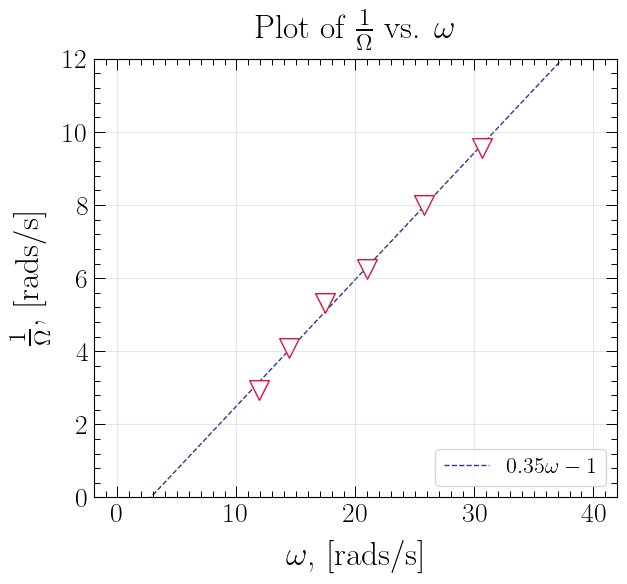

In [10]:



width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $\frac{1}{\Omega}$  vs. $\omega$", pad = 15, fontsize=24)
ax1.set_ylabel(r"$\frac{1}{\Omega}$, [rads/s]",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$\omega$, [rads/s]",labelpad =10,fontsize=24)

ax1.scatter(lil_omega, 1/big_omega, marker='v', edgecolor='crimson', color='w',s=200)

ax1.plot(np.linspace(0,40,100), lin_fit(np.linspace(0,40,100), *params), c='navy', linestyle='--', zorder=0, linewidth=1, alpha=0.8, label=r"$0.35\omega -1$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(2));ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_major_locator(MultipleLocator(10));ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16}, loc='lower right')
ax1.set_ylim(0,12)
#ax1.set_xlim(0,0.4)

ax1.grid(True)
plt.show()

4. Write a program to compute and plot an approximation the electric field surrounding the arrangement
described in question 1, setting a = 6 cm, c = 8 cm, and Q = 1 μC. I suggest determining the approximate
solution by representing the line charge as a series of point charges, spaced 5 mm apart along the length of
the true line charges. Following this make a comparison between the field calculated at (5a, 0, 5c) by your
program, and the value expected from part b) of Question 1.

    a) What is the ratio of the field strengths between these 2 approximate models?
            Now, present the field in a 2D plane that contains the line charges, in the styles below:

    b) As contours of electric field strength.

    c) As an arrow (quiver) plot to show the field direction. The arrow length should be constant.

    d) As a streamline plot, which should show field-lines similar to those you sketched in question 1b.

    e) Comment on these plots and method: Which of the plots do you think is the most instructive to
         allow viewers to understand the essentials of the field around the arrangement? Are there plots you
          can think of that would have been more interesting or perhaps more useful than these? Given more
         time what might you have done to improve the plots to make them easier for the viewer to digest?

In [3]:
# the most obvious place to start is by defining all of the constant values:

a = 0.06; c = 0.08 #m
Q = 1*10**(-6) #C

e0 = 8.854187817 * 10**(-12) # F/m , C/Vm

pi_4 = 4 * np.pi

The next step is to generate an approximation for the scenario by 
placing N point charges at a spacing of l in the place of the wire. The field generated by one of these point charges is given by:

$$
\vec{E}_i = \frac{q_i}{4 \pi \epsilon_0} \frac{\hat{r}_i}{r^2_i} = \frac{q_i}{4 \pi \epsilon_0} \frac{\vec{r}_i}{r^3_i} =\frac{q_i}{4 \pi \epsilon_0} \frac{x_i\hat{x} + z_i\hat{z}}{r^3_i}
$$

The last expression is true because we only care about the slice where $y=0$. Component wise we then get:

$$
E_i^x = \frac{q_i}{4 \pi \epsilon_0} \frac{x_i\hat{x} }{r^3_i}; \ E_i^z = \frac{q_i}{4 \pi \epsilon_0} \frac{z_i\hat{z} }{r^3_i}
$$

The field at any point will then be the vector:

$$\vec{E}(x,z) = \sum_i^N \frac{q_i}{4 \pi \epsilon_0} \frac{\vec{r}_i}{r^3_i}
$$

In [56]:
# we may first write a function that implements this approximation:

def point_charge_approx(A, C, x_pos=x_positions, z_pos=z_positions, charges=all_charges):
    '''
    Takes coordinates A, C (A=x, C=z)
    as well as the z and x positions of all
    of the point charges and their respective charges
    and returns the electric field vector at
    the point A,C
    '''
    
    # initializes the E components:
    E_x = 0.0; E_z = 0.0
    
    # loops through every charge and adds their
    # field component contribution at (A,C)
    
    for i in range(len(charges)):
        x_point = x_pos[i]
        z_point = z_pos[i]
        charge = charges[i]
        
        r_squiggle_x = A - x_point
        r_squiggle_z = C - z_point
        
        r_mag = np.sqrt(r_squiggle_z**2 + r_squiggle_x**2)
        
        x_component = (1/(pi_4*e0)) * charge * r_squiggle_x / (r_mag**3)
        z_component = (1/(pi_4*e0)) * charge * r_squiggle_z / (r_mag**3)
        
        E_x += x_component; E_z += z_component
        
    return E_x, E_z



We may also use the approximation we found from question 1. b). This took the form:

$$ 
\vec{E}_{dip} = \frac{2cQ}{4 \pi \epsilon_0} \frac{1}{(A^2+C^2)^{5/2}} \left[3AC\hat{x} +(2C^2 -A^2) \hat{z}\right]
$$

Where (A,C) is the coordinate in the plane, c is half the spacing between the two wires and Q is their charge.

In [57]:
def dipole_approx(A, C, charge=Q, spacing=c):
    '''
    Takes coordinates A, C (A=x, C=z)
    and returns the dipole field components 
    at that point
    '''
    
    r_mag = np.sqrt(A**2+C**2)
    
    prefactor = ((2*spacing*charge)/(pi_4*e0)) * (1/(r_mag**5))
    
    E_x = prefactor * (3 * A * C)
    E_z = prefactor * (2*C*C - A*A)
    
    return E_x, E_z

In [58]:
# the above functions are general for any scenario of this morphology. 
# we now want to apply them to our case:

# for the point charge approximation:

# we have N = 2a/spacing + 1 charges (one at zero)

spacing = 0.005

N = int(2*a/(spacing) +1)

# and the total charge is distributed evenly among the charges:

q_pc = Q / N

# absolute positions of all the charges:

x_pc_pos = np.linspace(-a, a, N); z_pc_pos = np.ones(N) * c

# top and bottom positions and charges:

x_pc_top = x_pc_pos; x_pc_bot = x_pc_pos; z_pc_top = z_pc_pos; z_pc_bot = -z_pc_pos
top_charges = np.ones(N) * q_pc; bot_charges = -np.ones(N) * q_pc


# adding all components into succinct data objects:

x_positions = np.concatenate([x_pc_top,x_pc_bot])
z_positions = np.concatenate([z_pc_top,z_pc_bot])
all_charges = np.concatenate([top_charges,bot_charges])

In [59]:
# It will also be useful to calculate the magnitude of the fields for 
# normalization purposes and part a):

def point_charge_mag(A,C):
    '''
    Takes coordinates A, C (A=x, C=z)
    and returns the magnitude of the 
    field at that point
    '''
    E_x, E_z =point_charge_approx(A, C, x_positions, z_positions, all_charges)
    
    E_mag = np.sqrt(E_x**2 + E_z**2)
    
    return E_mag
    
def dipole_mag(A,C):
    '''
    Takes coordinates A, C (A=x, C=z)
    and returns the magnitude of the 
    field at that point
    '''
    E_x, E_z =dipole_approx(A, C)
    
    E_mag = np.sqrt(E_x**2 + E_z**2)
    
    return E_mag

In [60]:
# we may now proceed with the problem solutions. The first step here is to
# find the ratios of the two fields at the point (5a, 0, 5c)

xp = 5*a; zp = 5*a

E_mag_pc_5ac = point_charge_mag(xp,zp)

E_mag_dip_5ac = dipole_mag(xp,zp)

mag_ratio  = E_mag_dip_5ac/E_mag_pc_5ac

print(f"The ratio of the two methods is (dip/pc): {mag_ratio:3f}")

The ratio of the two methods is (dip/pc): 0.977877


In [61]:
# we now need to create vector fields to plot!:

# easiest if we first vectorize the functions involved:

point_charge = np.vectorize(point_charge_approx)
dipole = np.vectorize(dipole_approx)
pc_mag = np.vectorize(point_charge_mag)
dip_mag = np.vectorize(dipole_mag)

In [310]:
# we can then generate a meshgrid surrounding the system to a desired distance away.
# will start with a value of 5*c: after some trying 4.5 c is a nice ratio of near and far to the 
# charge distribution.

x_plot = np.linspace(-4.5*c, 4.5*c, 200)
z_plot = np.linspace(-4.5*c, 4.5*c, 200)

XX, ZZ = np.meshgrid(x_plot, z_plot)

# now we may find the fields:

pc_field = point_charge(XX, ZZ)
dip_field = dipole(XX,ZZ)

norm_pc_field = pc_field / pc_mag(XX,ZZ)
norm_dip_field = dip_field / dip_mag(XX,ZZ)

pc_mag_field = pc_mag(XX,ZZ)
dip_mag_field = dip_mag(XX,ZZ)

In [311]:
# Please note!: the addition of the pcolormesh here is only because I
# think it looks really cool. Overlaying it is the correct contour plot

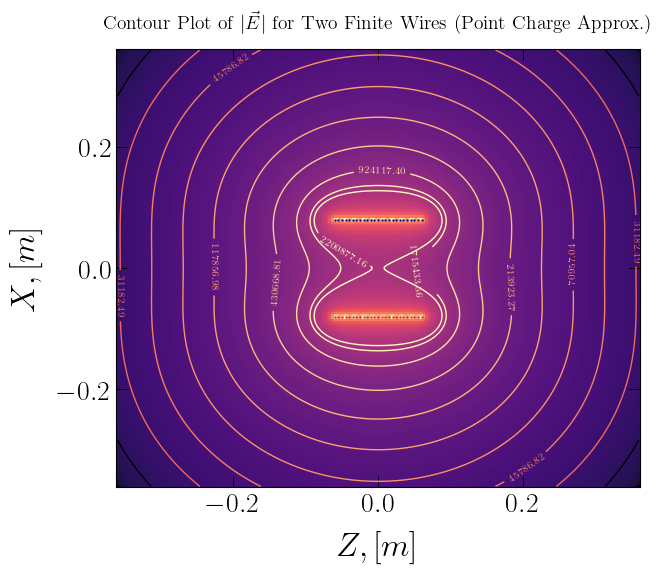

In [312]:
# we may now plot the requisite images:

# plotting shifts:

x_lines = np.linspace(-5*c, -0.1*c, 10)
z_lines = np.zeros(10)

E_lines = pc_mag(x_lines, z_lines)

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Contour Plot of $|\vec{E}|$ for Two Finite Wires (Point Charge Approx.)", pad = 15, fontsize=14)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.scatter(x_pc_top,z_pc_top,c='navy',s=.4,label='positive charges')
ax1.scatter(x_pc_bot,z_pc_bot,c='crimson',s=.4,label='negative charges')

CP = ax1.contour(XX, ZZ, pc_mag_field, levels=E_lines,linewidths=1,cmap="magma",norm=PowerNorm(0.07))
ax1.clabel(CP, inline=True, fontsize=7, fmt=lambda x:f"{x:0.2f}")
ax1.pcolormesh(XX,ZZ,pc_mag_field, cmap='magma', norm=PowerNorm(0.17),alpha=1,zorder=0)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 16})
#ax1.set_ylim(-15,130)
ax1.grid(False)
plt.show()


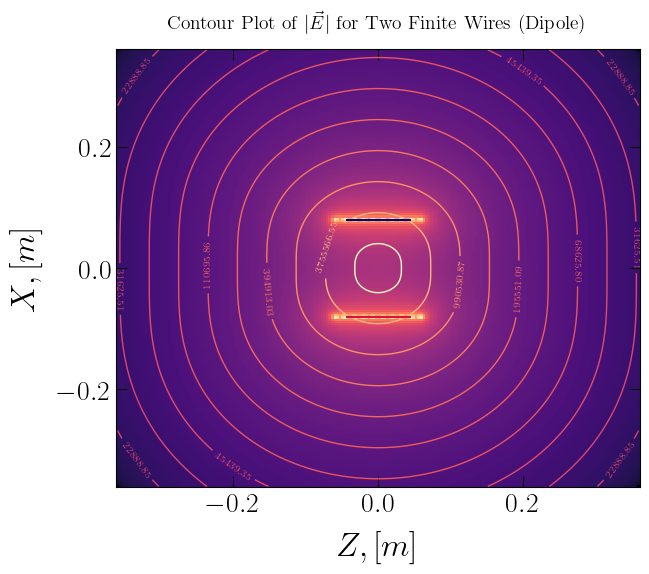

In [313]:
# we may now plot the requisite images:

# plotting shifts:

x_lines = np.linspace(-7*c, -0.4*c, 14)
z_lines = np.zeros(14)

E_lines = dip_mag(x_lines, z_lines)

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Contour Plot of $|\vec{E}|$ for Two Finite Wires (Dipole)", pad = 15, fontsize=14)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.axhline(c,xmin=0.5-a,xmax=0.5+a,c='navy',label='positive charges', zorder=10)
ax1.axhline(-c,xmin=0.5-a,xmax=0.5+a,c='crimson',label='Negative charges', zorder=10)

CP = ax1.contour(XX, ZZ, dip_mag_field, levels=E_lines,linewidths=1,cmap="magma",norm=PowerNorm(0.07))
ax1.clabel(CP, inline=True, fontsize=7, fmt=lambda x:f"{x:0.2f}")
ax1.pcolormesh(XX,ZZ,pc_mag_field, cmap='magma', norm=PowerNorm(0.17),alpha=1,zorder=0)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 16})
#ax1.set_ylim(-15,130)
ax1.grid(False)
plt.show()


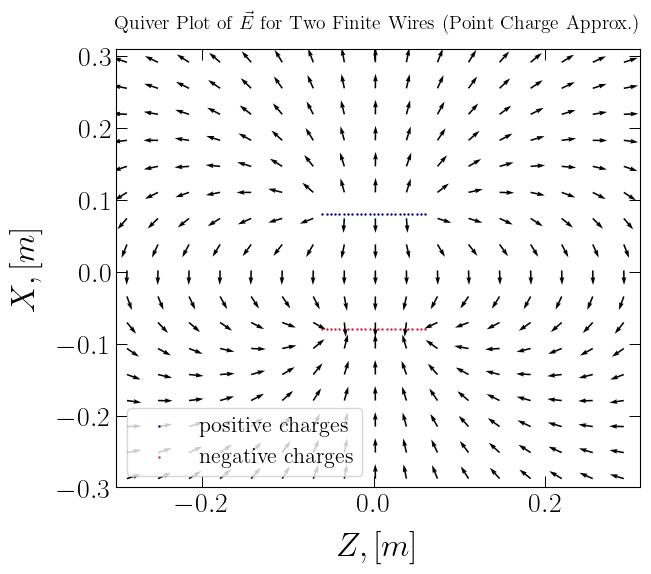

In [319]:
# plotting changes;

skip = 10; 

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Quiver Plot of $\vec{E}$ for Two Finite Wires (Point Charge Approx.)", pad = 15, fontsize=14)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.scatter(x_pc_top,z_pc_top,c='navy',s=.5,label='positive charges')
ax1.scatter(x_pc_bot,z_pc_bot,c='crimson',s=.5,label='negative charges')


ax1.quiver(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip],
           point_charge(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip])[0]/pc_mag(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip]),
           point_charge(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip])[1]/pc_mag(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip]))

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16})
ax1.set_ylim(-0.3,0.31)
ax1.set_xlim(-0.3,0.31)
ax1.grid(False)
plt.show()

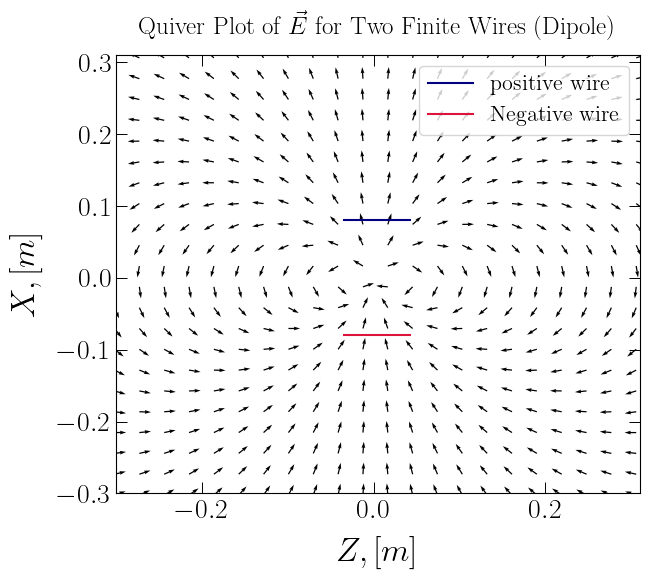

In [323]:
# plotting changes;

skip = 8; 

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Quiver Plot of $\vec{E}$ for Two Finite Wires (Dipole)", pad = 15, fontsize=18)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.axhline(c,xmin=0.5-a-0.005,xmax=0.5+a,c='navy',label='positive wire', zorder=10)
ax1.axhline(-c,xmin=0.5-a-0.005,xmax=0.5+a,c='crimson',label='Negative wire', zorder=10)

ax1.quiver(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip],
           dipole(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip])[0]/dip_mag(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip]),
           dipole(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip])[1]/dip_mag(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip]))

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16})
ax1.set_ylim(-0.3,0.31)
ax1.set_xlim(-0.3,0.31)
ax1.grid(False)
plt.show()

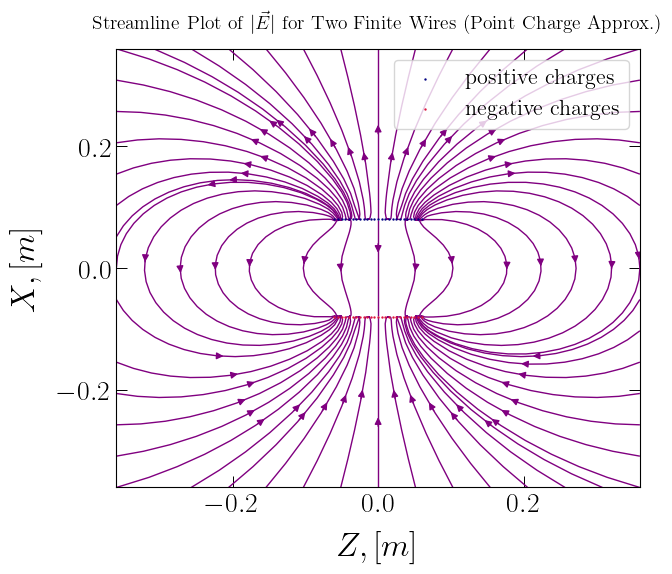

In [316]:
# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Streamline Plot of $|\vec{E}|$ for Two Finite Wires (Point Charge Approx.)", pad = 15, fontsize=14)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.scatter(x_pc_top,z_pc_top,c='navy',s=.5,label='positive charges',zorder=10)
ax1.scatter(x_pc_bot,z_pc_bot,c='crimson',s=.5,label='negative charges',zorder=10)

ax1.streamplot(XX,ZZ, pc_field[0],pc_field[1], color='purple', density=0.5, linewidth = 1,broken_streamlines=False)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16})
ax1.grid(False)
plt.show()

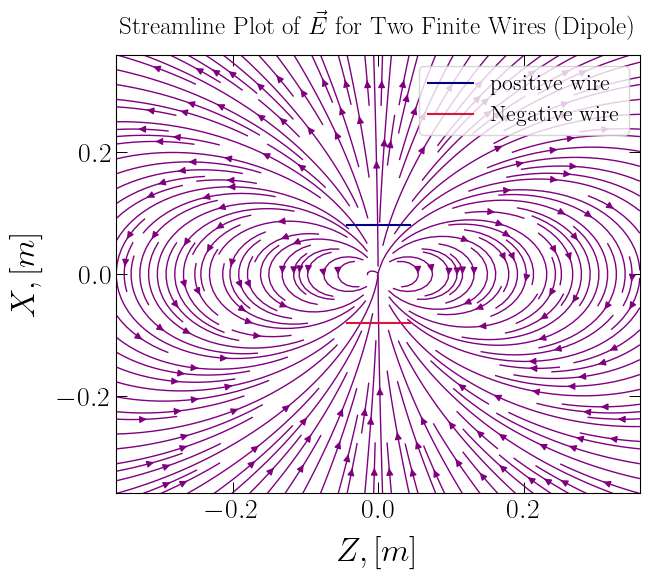

In [336]:
#starts = np.concatenate([np.array([x_positions,z_positions]).T+0.1,np.array([x_positions,z_positions]).T-0.1])

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Streamline Plot of $\vec{E}$ for Two Finite Wires (Dipole)", pad = 15, fontsize=18)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.axhline(c,xmin=0.5-a,xmax=0.5+a,c='navy',label='positive wire', zorder=10)
ax1.axhline(-c,xmin=0.5-a,xmax=0.5+a,c='crimson',label='Negative wire', zorder=10)

ax1.streamplot(XX,ZZ, dip_field[0],dip_field[1], color='purple', density=2, linewidth = 1)#,broken_streamlines=False)#,start_points=starts)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16})
ax1.grid(False)
plt.show()

e) Comment on these plots and method: Which of the plots do you think is the most instructive to
         allow viewers to understand the essentials of the field around the arrangement? Are there plots you
          can think of that would have been more interesting or perhaps more useful than these? Given more
         time what might you have done to improve the plots to make them easier for the viewer to digest?

Each plot has their own pros and cons but also display fairly different info. The quiver and streamlines allow for comprehension of direction and flow of the fields, which for a vector field is significant. They do, however, lose any concept of magnitude. Of course the quiver plots could be set up to allow for vector length to display relative magnitude but for any type of complex field this gets messy very fast. The streamlines are nice because they give a sense of continuity to the fields that is otherwise lost for a quiver but are quite difficult to untangle. It is easy to visualize a path that could be taken through the field for the streamlines. They do give the impression that the field strength is somewhat uniform which is of course not the case.

Where the so called vector plots leave to be desired, the contour plots fill in the gaps. These types of plots are much easier to digest and give pertinent information about the magnitudes of the field. They lose all semblance of directionality thought which is important for these types of fields.

There is likely a combination of the strengths of the two types of plots that extracts the most out of the data. If we maintain that both magnitude and direction are needed, it seems like there may be a number of ways to achieve this. Contours overlayed by streamlines and quivers might be extremely noisy. A thought might be to scale the colour of the vectors by magnitude instead of scaling the length. Depending on the range of vector magnitudes, this may too prove hard to read. 

Without loss of comprehension, a type of heatmap corresponding to the magnitude of the field overlayed with directional information might be more informative. An attempt at seeing if this is the case can be found below. With more time, playing around with spatial vs. point-like data could be interesting.

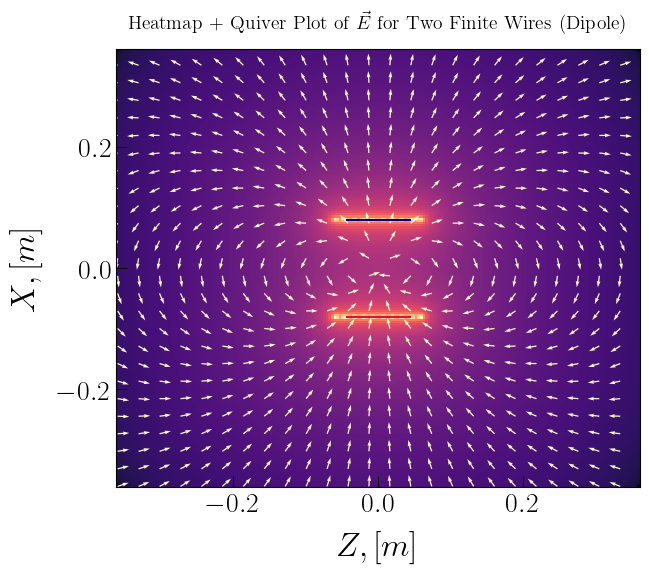

In [341]:
# we may now plot the requisite images:

# plotting shifts:

x_lines = np.linspace(-7*c, -0.4*c, 14)
z_lines = np.zeros(14)

E_lines = dip_mag(x_lines, z_lines)

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Heatmap + Quiver Plot of $\vec{E}$ for Two Finite Wires (Dipole)", pad = 15, fontsize=14)
ax1.set_ylabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$Z, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.axhline(c,xmin=0.5-a,xmax=0.5+a,c='navy',label='positive charges', zorder=10)
ax1.axhline(-c,xmin=0.5-a,xmax=0.5+a,c='crimson',label='Negative charges', zorder=10)

ax1.quiver(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip],
           dipole(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip])[0]/dip_mag(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip]),
           dipole(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip])[1]/dip_mag(XX[:-1:skip, :-1:skip], ZZ[:-1:skip, :-1:skip]), color='#fffad1')
ax1.pcolormesh(XX,ZZ,pc_mag_field, cmap='magma', norm=PowerNorm(0.17),alpha=1,zorder=0)


#ax1.legend( prop={'size': 16})
#ax1.set_ylim(-15,130)
ax1.grid(False)
plt.show()
